In [7]:
from utils.utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
from utils.lta_omv_scraper import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import time
from datetime import datetime
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fill missing 'make' info from title

In [48]:
orig_df = pd.read_csv(r"./dataset/train.csv")

# clean model
orig_df['model'] = orig_df['model'].apply(lambda x:x.replace('(', ''))
orig_df['reg_date_dt'] = orig_df['reg_date'].apply(lambda x: datetime.strptime(x, "%d-%b-%Y"))
orig_df['reg_date_year'] = orig_df['reg_date_dt'].apply(lambda x:x.year)
orig_df['reg_date_month'] = orig_df['reg_date_dt'].apply(lambda x:x.month)

In [49]:
train_df, val_df = train_test_split(orig_df, test_size=0.2, random_state=42, shuffle=True)

In [54]:
# idx = train_df[train_df['make'].isna()].index
# idx_val = val_df[val_df['make'].isna()].index
# val_df.loc[idx_val]

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# # URL of the webpage to scrape
# url = 'https://www.carlogos.org/car-brands-a-z/'

# # Define headers to mimic a web browser
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 ' +
#                   '(KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'
# }

# # Send a GET request to the webpage with headers
# response = requests.get(url, headers=headers)
# response.raise_for_status()  # Check for request errors

# # Parse the HTML content
# soup = BeautifulSoup(response.text, 'html.parser')

# # Find the main content div that contains the list of car brands
# main_content = soup.find('div', class_='main-l')

# # Initialize an empty list to store car brands
# car_brands = []

# # Find all 'dl' elements within the main content
# dl_elements = main_content.find_all('dl')

# for dl in dl_elements:
#     # Each 'dl' represents a letter section
#     # Find all 'dd' elements within each 'dl', which contain the car brand links
#     dd_elements = dl.find_all('dd')
#     for dd in dd_elements:
#         # Get the car brand name from the 'a' tag text
#         brand_name = dd.find('a').get_text(strip=True)
#         car_brands.append(brand_name)

# # Print the total number of car brands found
# print(f"Total car brands found: {len(car_brands)}")

# # Print the list of car brands
# for brand in car_brands:
#     print(brand)


In [51]:
make_ls = train_df['make'].dropna().unique()

make_model_imputer = MakeModelImputer(make_ls)
train_df = make_model_imputer.fit_transform(train_df)
val_df = make_model_imputer.transform(val_df) # 4 rows missing

In [52]:
# ## Sanity check for make_model_imputer
# train_df.loc[idx]
# val_df.loc[idx_val]

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month
12456,1302031,Hyundai Avante 1.6M (COE till 05/2024),hyundai,avante,looking for exporter to,2009.0,NaN,10-jun-2009,mid-sized sedan,"coe car, direct owner sale",...,NaN,NaN,uncategorized,view specs of the hyundai avante,NaN,NaN,900.0,2009-06-10,2009,6
15191,1307337,Honda Vezel Hybrid 1.5A X,honda,vezel,showroom condition! 100% loan available! full ...,2017.0,NaN,10-may-2018,suv,"parf car, hybrid cars",...,NaN,NaN,uncategorized,fuel efficient 1.5l 4 cylinder inline dohc i-v...,"leather upholstery, sports rims, pioneer touch...",NaN,67800.0,2018-05-10,2018,5
6253,1278944,Honda Civic 1.6A VTi (COE till 02/2029),honda,civic,0,2008.0,NaN,23-feb-2009,mid-sized sedan,coe car,...,NaN,NaN,uncategorized,powerful and responsive 1.6l 4 cylinder inline...,"new sports rims, audio system, reverse sensors...",NaN,59888.0,2009-02-23,2009,2
13952,1296512,Mercedes-Benz G-Class G63 AMG 4MATIC,mercedes-benz,amg,one lady owner only. super low mileage. park u...,2020.0,NaN,10-may-2021,suv,"parf car, rare & exotic, premium ad car, low m...",...,NaN,NaN,uncategorized,powered by a 4.0l bi-turbo v8 hand built engin...,"360 parking cameras/sensors. 22"" original spor...",NaN,732800.0,2021-05-10,2021,5
13338,1330619,Honda Fit 1.5A RS (COE till 07/2028),honda,fit,well maintained by lady owner! comes with a ve...,2007.0,NaN,21-aug-2008,hatchback,"coe car, low mileage car",...,NaN,NaN,uncategorized,reliable and fuel efficient 1.5l i-vtec engine...,"leather seats, retractable side mirrors, andro...",NaN,57800.0,2008-08-21,2008,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,1280328,Honda Jazz 1.5A RS,honda,jazz,flexible in-house loan and bank loan available...,2016.0,NaN,16-mar-2017,hatchback,"parf car, premium ad car",...,NaN,NaN,uncategorized,reliable 1.5l dohc i-vtec engine with earth dr...,touch screen audio system with bluetooth funct...,NaN,48800.0,2017-03-16,2017,3
22192,1301634,Volkswagen Golf 1.4A TSI (COE till 05/2032),volkswagen,golf,0,2013.0,NaN,29-apr-2013,hatchback,"coe car, premium ad car",...,NaN,NaN,uncategorized,"1.4l turbocharged engine, 7 speed dsg auto, sp...","tvs stage 2+ ecu/dsg, approved bastuck catback...",NaN,130000.0,2013-04-29,2013,4
17608,1327241,Kia Cerato 1.6A LX,kia,cerato,consignment unit! 1 owner and well taken care ...,2018.0,NaN,03-apr-2019,mid-sized sedan,parf car,...,NaN,NaN,uncategorized,view specs of the kia cerato,"factory fitted infotainment, reverse camera/se...",NaN,64800.0,2019-04-03,2019,4
1748,1302879,MINI Cooper Electric,mini,cooper,17,2021.0,NaN,28-dec-2022,hatchback,"parf car, premium ad car, low mileage car, ele...",...,NaN,NaN,uncategorized,proven electric powertrain from bmw i3 that is...,"panoramic glassroof, wireless smartphone conne...",NaN,174588.0,2022-12-28,2022,12


In [46]:
# compiled_regex = compile_make_pattern(make_ls)
# train_df = apply_make_extraction(train_df, compiled_regex)

In [433]:
train_df['make'] = train_df['make'].fillna(train_df['extracted_make'])
train_df

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,extracted_make
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0,land rover
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,mercedes-benz
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0,honda
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0,toyota
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0,lexus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1329201,Mercedes-Benz C-Class C180 (COE till 06/2031),mercedes-benz,c180,elegant looking and very well maintained by ow...,2011.0,NaN,14-jul-2011,luxury sedan,"coe car, premium ad car, low mileage car",...,31019.0,31019.0,NaN,NaN,uncategorized,inline 4 16 valves rwd engine displacement 179...,new battery new throttle body new recording ca...,NaN,85000.0,mercedes-benz
24996,1285898,Bentley Bentayga 4.0A V8,bentley,bentayga,"ceo car chauffeur driven, always sheltered par...",2018.0,23-aug-2018,29-apr-2020,suv,"parf car, direct owner sale, rare & exotic",...,137136.0,218845.0,NaN,NaN,uncategorized,"4.0 liter twin turbocharged v8 engine, produci...","panoramic roof, 8""touchscreen display, navigat...",NaN,412888.0,bentley
24997,1306309,Mercedes-Benz A-Class A180,mercedes-benz,a180,great for short term drive or to renew coe. op...,2014.0,NaN,01-apr-2015,hatchback,"parf car, premium ad car, low mileage car, sgc...",...,22897.0,14056.0,NaN,NaN,uncategorized,1.6l inline 4 turbocharged engine with 7 speed...,"dual electric seats with 3 memory settings, di...",NaN,23888.0,mercedes-benz
24998,1306902,Audi A3 Sportback 1.0A TFSI S-tronic,audi,a3,sporty audi a3 in town with upgraded coil over...,2017.0,NaN,30-jun-2017,hatchback,parf car,...,23772.0,15281.0,NaN,NaN,uncategorized,"fuel efficient 3 cylinder turbocharged engine,...","bbs sport rim, audi mmi/bluetooth/audio sound ...",NaN,53300.0,audi


In [434]:
# for sanity check
# missing_idx = train_df[train_df['make'] == 1].index
train_df[train_df['model'] == '(coe']

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,extracted_make


### 'Feature' extract cylinder count 

In [32]:
train_df['cylinder_cnt'] = train_df['features'].apply(lambda x: extract_cylinder_from_features(x) if pd.notnull(x) else None)

In [33]:
train_df['cylinder_cnt'].value_counts()

cylinder_cnt
4.0     6741
6.0     1133
3.0      773
8.0      601
12.0     135
10.0      51
5.0       10
7.0        2
2.0        2
1.0        1
Name: count, dtype: int64

In [80]:
# display(HTML(train_df[train_df['type_of_vehicle'] == 'truck'].to_html()))
# display(HTML(train_df[train_df['model'] == 'dyna'].to_html()))

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,extracted_make,cylinder_cnt
251,1327467,Toyota Dyna 150 3.0M,toyota,dyna,"one careful owner with genuine low mileage done 155421km, original upholstery, full checker plate, durable toyota dyna 150 10ft lorry, extremely condition, like new dyna, all wear and tear parts replaced, no repairs needed, new paintwork, don't miss it out before is gone, call us for more information.",2014.0,NaN,17-nov-2014,truck,-,manual,1680.0,NaN,diesel,2982.0,1.0,NaN,57389,NaN,1431.0,155421.0,27856.0,1393.0,NaN,16-nov-2034,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,14800.0,toyota,4.0
307,1313950,Toyota Dyna 150 2.8M,toyota,dyna,"y-plate toyota dyna. 1 owner only! attached with retractable canopy. full checker plate. vehicle very well maintained, in good condition. still under agent warranty. contact us now for viewing!",2022.0,NaN,31-oct-2022,truck,premium ad car,manual,1800.0,NaN,diesel,2755.0,1.0,12270.0,47365,NaN,37892.0,NaN,31608.0,1581.0,NaN,30-oct-2042,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,101800.0,toyota,4.0
1007,1306422,Toyota Dyna 150 3.0M,toyota,dyna,g plate diesel manual transmission! powerful & smooth 3l engine! genuine low mileage and 1 ownership only! exclusive premium warranty provided! free full checker plate and canopy without any cost. flexible financing package can be discussed. attractive trade in quotes offered. immediate handover anytime. whatsapp/call our friendly sales consultant to view this beauty today!,2020.0,NaN,24-aug-2020,truck,premium ad car,manual,1800.0,NaN,diesel,2982.0,1.0,13700.0,19911,NaN,12328.0,68000.0,35507.0,1776.0,NaN,23-aug-2040,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,84800.0,toyota,4.0
1090,1163193,Toyota Dyna 150 2.8M,toyota,dyna,"toyota dyna! immediate stock! most reliable toyota dyna in the market drive off with no worries! full agent unit warranty & free servicing package. comes with 3 years or 100,000km warranty! full loan with low interest rate or flexible in house loan available. trade in are welcome too! hurry and call our sales representative now to book an appointment to view and test drive now!",2022.0,NaN,30-dec-2022,truck,premium ad car,manual,1780.0,NaN,diesel,2755.0,1.0,13560.0,26409,NaN,22567.0,NaN,31608.0,1581.0,NaN,29-dec-2042,uncategorized,view specs of the toyota dyna 150 diesel,"front recording camera, single din radio mp3 player, reverse sensor, electric side mirror and many more free accessories!",NaN,115888.0,toyota,4.0
1195,1328728,Toyota Dyna 150 3.0M,toyota,dyna,smooth engine and gearbox transmission. silent undercarriage. attractive financing options available. all trade-ins are welcomed. contact our sales team now for more information.,2016.0,NaN,29-jun-2017,truck,-,manual,1740.0,NaN,diesel,2982.0,3.0,15770.0,38501,NaN,10865.0,NaN,32833.0,1642.0,NaN,28-jun-2037,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,44500.0,toyota,4.0
1252,1311994,Toyota Dyna 150 3.0M,toyota,dyna,good condition and well maintained regularly. standard stock accessories from toyota since day 1.,2016.0,NaN,29-jul-2016,truck,direct owner sale,manual,1780.0,NaN,diesel,2982.0,2.0,15130.0,37589,NaN,7652.0,NaN,35220.0,1761.0,NaN,28-jul-2036,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,30800.0,toyota,4.0
1309,1314305,Toyota Dyna 150 3.0M (COE till 07/2028),toyota,dyna,"high paper value, 10 footer lorry, diesel, half canopy with checkered plate, very well maintained, can renew for another 5 years coe, view to appreciate the condition at tampines.",2013.0,NaN,01-oct-2013,truck,coe car,manual,1780.0,NaN,diesel,2982.0,3.0,11070.0,39181,NaN,31710.0,110000.0,24970.0,1249.0,NaN,30-sep-2033,uncategorized,view specs of the 

In [63]:
cylinder_count_dict = extract_cylinder_by_model_make(train_df)

In [73]:
# Apply the impute function to the DataFrame
train_df['cylinder_cnt'] = train_df.apply(lambda x:impute_row_by_make_model(x, cylinder_count_dict, 'cylinder_cnt'), axis=1)

In [89]:
# fill remaining values with median of 4 cylinder (most common engine)
median_cylinder_cnt = train_df['cylinder_cnt'].median(axis=0)
train_df['cylinder_cnt'] = train_df['cylinder_cnt'].fillna(median_cylinder_cnt)

### Extract omv/arf

In [362]:
result_ls = get_lta_omv_data(2002, 2025)

In [363]:
df_lta_car_data = preprocess_lta_omv_data(result_ls)

In [364]:
df_lta_car_data['make_clean'].unique()

array(['alfa romeo', 'audi', 'bmw', 'chrysler', 'citroen', 'daewoo',
       'daihatsu', 'ford', 'honda', 'hyundai', 'jaguar', 'kia', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'proton', 'renault', 'rolls-royce', 'rover', 'saab',
       'seat', 'skoda', 'subaru', 'suzuki', 'toyota', 'volkswagen',
       'volvo', 'land rover', 'perodua', 'ferrari', 'daimler', 'bentley',
       'mini cooper', 'maserati', 'mini', 'smart', 'ssangyong',
       'chervolet', 'aston martin', 'jeep', 'chevrolet', 'lamborghini',
       'mg-f', 'mg', 'fiat', 'chery', 'td cars', 'dodge', 'lotus',
       'geely', 'mitsuoka', 'hafei', 'dongfeng', 'soyat', 'naza',
       'wuling', 'chana', 'golden dragon', 'zotye', 'hummer', 'cadillac',
       'foton', 'infiniti', 'mclaren', 'alpina', 'byd', 'bluecar',
       'maxus', 'tesla', 'alpine', 'polestar', 'great wall', 'gac',
       'xpeng', 'zeekr'], dtype=object)

In [242]:
# df_lta_car_data.to_csv('./dataset/lta_omv_data.csv')


#### impute data from make and model 

In [374]:
def impute_using_lta_data(row):
    # print(row)
    if not np.isnan(row['omv']):
        return row['omv']
    else:
        make = row['make']
        model = row['model']
        year = row['reg_date_year']
        lookup_by_make_model_year = df_lta_car_data[(df_lta_car_data['make_clean'] == make) & (df_lta_car_data['model_split'].str.contains(model)) & (df_lta_car_data['year'] == year)]
        
        lookup_by_make_model = df_lta_car_data[(df_lta_car_data['make_clean'] == make) & (df_lta_car_data['model_split'].str.contains(model))]

        lookup_by_make = df_lta_car_data[(df_lta_car_data['make_clean'] == make)]
        
        if not lookup_by_make_model_year.empty:
            # print('lookup_by_make_model_year')
            return lookup_by_make_model_year['omv_clean'].mean()
        elif not lookup_by_make_model.empty:
            # print('lookup_by_make_model')
            return lookup_by_make_model['omv_clean'].mean()
        elif not lookup_by_make.empty:
            # print('lookup_by_make')
            return lookup_by_make['omv_clean'].mean()
        else: 
            return None

In [351]:
train_null_df = train_df[train_df['omv'].isna()]

In [352]:
df_lta_car_data[(df_lta_car_data['make_clean'] == 'mercedes-benz') & (df_lta_car_data['model_split'].str.contains('911sc')) & (df_lta_car_data['year'] == 2005)]['omv_clean'].mean()

nan

In [353]:
df_lta_car_data['make_clean'].unique()

array(['alfa romeo', 'audi', 'bmw', 'chrysler', 'citroen', 'daewoo',
       'daihatsu', 'ford', 'honda', 'hyundai', 'jaguar', 'kia', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'proton', 'renault', 'rolls-royce', 'rover', 'saab',
       'seat', 'skoda', 'subaru', 'suzuki', 'toyota', 'volkswagen',
       'volvo', 'land rover', 'perodua', 'ferrari', 'daimler', 'bentley',
       'mini cooper', 'maserati', 'mini', 'smart', 'ssangyong',
       'chervolet', 'aston martin', 'jeep', 'chevrolet', 'lamborghini',
       'mg-f', 'mg', 'fiat', 'chery', 'td cars', 'dodge', 'lotus',
       'geely', 'mitsuoka', 'hafei', 'dongfeng', 'soyat', 'naza',
       'wuling', 'chana', 'golden dragon', 'zotye', 'hummer', 'cadillac',
       'foton', 'infiniti', 'mclaren', 'alpina', 'byd', 'bluecar',
       'maxus', 'tesla', 'alpine', 'polestar', 'great wall', 'gac',
       'xpeng', 'zeekr'], dtype=object)

In [485]:
train_df['omv_new'] = train_df['omv']
train_df['omv_new'] = train_df.apply(impute_using_lta_data, axis=1)
train_df['omv_new'] = train_df['omv_new'].fillna(train_df['omv_new'].mean())

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   listing_id         25000 non-null  int64         
 1   title              25000 non-null  object        
 2   make               23684 non-null  object        
 3   model              25000 non-null  object        
 4   description        24320 non-null  object        
 5   manufactured       24993 non-null  float64       
 6   original_reg_date  255 non-null    object        
 7   reg_date           25000 non-null  object        
 8   type_of_vehicle    25000 non-null  object        
 9   category           25000 non-null  object        
 10  transmission       25000 non-null  object        
 11  curb_weight        24693 non-null  float64       
 12  power              22360 non-null  float64       
 13  fuel_type          5879 non-null   object        
 14  engine

In [487]:
# display(HTML(train_df.head(100).to_html()))

In [376]:
# sanity check
for i in range(10):
    print(df_lta_car_data[(df_lta_car_data['make_clean'] == train_null_df.iloc[i]['make']) & (df_lta_car_data['model_split'].str.contains(train_null_df.iloc[i]['model']))]['omv_clean'].mean())

nan
nan
22145.32950191571
nan
nan
nan
72662.36305732484
72662.36305732484
nan
150573.36170212767


### Parse category

In [55]:
train_df['category']

23311                                       premium ad car
23623                                              coe car
1020                              parf car, premium ad car
12645                                             parf car
1533                                              parf car
                               ...                        
21575    parf car, consignment car, sgcarmart warranty ...
5390                              parf car, premium ad car
860                                               parf car
15795    parf car, direct owner sale, rare & exotic, lo...
23654                              coe car, premium ad car
Name: category, Length: 20000, dtype: object

In [114]:
train_df['category_split'] = train_df['category'].str.split(',').apply(lambda x: [item.strip() for item in x])
train_df['category_split']

0                                               [parf car]
1                               [parf car, premium ad car]
2               [coe car, premium ad car, low mileage car]
3                                [coe car, premium ad car]
4                                [coe car, premium ad car]
                               ...                        
24995           [coe car, premium ad car, low mileage car]
24996         [parf car, direct owner sale, rare & exotic]
24997    [parf car, premium ad car, low mileage car, sg...
24998                                           [parf car]
24999                           [parf car, premium ad car]
Name: category_split, Length: 25000, dtype: object

In [111]:
max(train_df['category_split'].apply(lambda x:len(x)).to_numpy())

6

In [128]:
train_df['category_split'].iloc[:,].values

array([list(['parf car']), list(['parf car', 'premium ad car']),
       list(['coe car', 'premium ad car', 'low mileage car']), ...,
       list(['parf car', 'premium ad car', 'low mileage car', 'sgcarmart warranty cars']),
       list(['parf car']), list(['parf car', 'premium ad car'])],
      dtype=object)

In [135]:
mlb = MultiLabelBinarizer()
train_df = train_df.join(pd.DataFrame(mlb.fit_transform(train_df['category_split']),
                          columns=mlb.classes_,
                          index=train_df.index))

In [137]:
mlb.classes_

array(['-', 'almost new car', 'coe car', 'consignment car',
       'direct owner sale', 'electric cars', 'hybrid cars',
       'imported used vehicle', 'low mileage car', 'opc car', 'parf car',
       'premium ad car', 'rare & exotic', 'sgcarmart warranty cars',
       'sta evaluated car', 'vintage cars'], dtype=object)

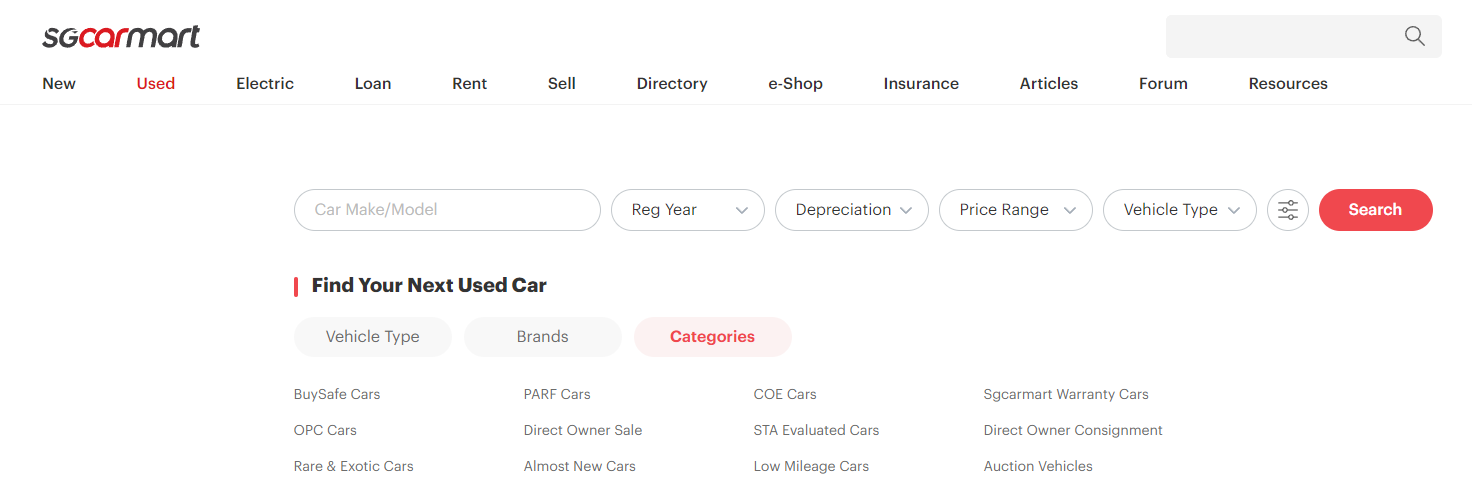

In [140]:
train_df[['almost new car', 'coe car', 'consignment car',
       'direct owner sale', 'electric cars', 'hybrid cars',
       'imported used vehicle', 'low mileage car', 'opc car', 'parf car',
       'premium ad car', 'rare & exotic', 'sgcarmart warranty cars',
       'sta evaluated car', 'vintage cars']]

,almost new car,coe car,consignment car,direct owner sale,electric cars,hybrid cars,imported used vehicle,low mileage car,opc car,parf car,premium ad car,rare & exotic,sgcarmart warranty cars,sta evaluated car,vintage cars
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
24996,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
24997,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0
24998,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [120]:
train_df['category_split'].iloc[:,].values

array([list(['parf car']), list(['parf car', 'premium ad car']),
       list(['coe car', 'premium ad car', 'low mileage car']), ...,
       list(['parf car', 'premium ad car', 'low mileage car', 'sgcarmart warranty cars']),
       list(['parf car']), list(['parf car', 'premium ad car'])],
      dtype=object)

In [379]:
len(train_df['model'].unique())

799

In [393]:
train_df[train_df['category'] == '-'].head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,parf car,premium ad car,rare & exotic,sgcarmart warranty cars,sta evaluated car,vintage cars,reg_date_dt,reg_date_year,reg_date_month,omv_new
12,1270388,Mitsubishi Fuso Canter FEA01,mitsubishi,canter,"mitsubishi freezer truck with 1 owner, new pai...",2019.0,NaN,31-may-2019,truck,-,...,0,0,0,0,0,0,2019-05-31,2019,5,29628.0
102,1312688,Peugeot Partner 1.6A HDi,peugeot,partner,brand new paintwork!,2016.0,NaN,03-aug-2017,van,-,...,0,0,0,0,0,0,2017-08-03,2017,8,19591.0
111,1319901,Honda N-Van Turbo Style Fun Honda Sensing,honda,n-van,well-maintained by owner! regularly serviced b...,2022.0,NaN,29-apr-2022,van,-,...,0,0,0,0,0,0,2022-04-29,2022,4,18213.0
114,1327337,Toyota Hiace 3.0M DX,toyota,hiace,very well maintained by premium owner! no repa...,2016.0,NaN,06-sep-2016,van,-,...,0,0,0,0,0,0,2016-09-06,2016,9,29761.0
209,1321103,Toyota Hiace 3.0A,toyota,hiace,1 onwer since day one! genuine low mileage! ro...,2020.0,NaN,21-sep-2020,van,-,...,0,0,0,0,0,0,2020-09-21,2020,9,29352.0


### Eco category

In [417]:
train_df['model'].unique()

array(['range', 'c200', 'odyssey', 'altis', 'gs', 's2000', 'huracan',
       'avante', 'evolution', 'c180', 'impreza', 'canter', 'e200', '318i',
       'q3', 'vios', 'outlander', '3', 'civic', '630ci', '2', '504',
       'noah', 'golf', 'elantra', 'e', 'stream', 'arteon', 'continental',
       '430i', 'e230', 'cr-v', 'glc250', 'shuttle', '840i', 'amg', '216i',
       'city', 'actyon', 'cyz52k', 'm4', 'q2', 'v40', 'asx', 'cabstar',
       'harrier', 'cerato', 'i-pace', 'estima', 'qashqai', 'cooper',
       'hiace', 'f', 'rx', 'stonic', 'leon', 'i30', 'nv350', 'x4', 'note',
       'rush', 'es', 'glc200', 'partner', 'vezel', 'fit', '420i',
       'passat', 'r8', 'a1', 'e-dispatch', 'q5', 'alphard', '328',
       'accent', 'macan', 'getz', 'model', 's60', 'wraith', 'cayenne',
       'discovery', 'every', 'attrage', 'lancer', 'forester', 'spacia',
       'n-van', 'cla180', 'x3', 'gla180', 'a200', 'citan', 'cx-3', 'a3',
       'fvr34', 'seltos', 's90', 'jazz', 'm3', '523i', 'freed', 'c4',
  

In [394]:
eco_df = pd.read_csv('./dataset/CO2 Emissions_Canada.csv')

In [396]:
eco_df['make_clean'] = eco_df['Make'].apply(lambda x:x.lower())
eco_df['model_clean'] = eco_df['Model'].apply(lambda x:x.lower())

In [397]:
eco_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),make_clean,model_clean
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,acura,ilx
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,acura,ilx
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,acura,ilx hybrid
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,acura,mdx 4wd
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,acura,rdx awd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,volvo,xc40 t5 awd
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,volvo,xc60 t5 awd
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,volvo,xc60 t6 awd
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,volvo,xc90 t5 awd


In [473]:
def impute_using_eco_data(row):
    make = row['make']
    model = row['model']
    year = row['reg_date_year']
    # try:
    #     lookup_by_make_model = eco_df[(eco_df['make_clean'] == make) & (eco_df['model_clean'].str.contains(model))]
    # except Exception as e:
    #     print(e, make,model,year,row['model'])
    
    lookup_by_make_model = eco_df[(eco_df['make_clean'] == make) & (eco_df['model_clean'].str.contains(model))]
    lookup_by_make_model_exact = eco_df[(eco_df['make_clean'] == make) & (eco_df['model_clean'] == model)]

    # lookup_by_make = df_lta_car_data[(df_lta_car_data['make_clean'] == make)]
    
    if not lookup_by_make_model_exact.empty:
        return lookup_by_make_model_exact['CO2 Emissions(g/km)'].mean()
    elif not lookup_by_make_model.empty:
        return lookup_by_make_model['CO2 Emissions(g/km)'].mean()
    else:
        return Nonez

In [474]:
train_df['co2_emission'] = train_df.apply(impute_using_eco_data, axis=1)

In [477]:
train_df['co2_emission'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: co2_emission
Non-Null Count  Dtype  
--------------  -----  
10933 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [464]:
eco_df[(eco_df['make_clean'] == 'bmw') & (eco_df['model_clean'].str.contains('220i'))]['CO2 Emissions(g/km)']

76      193
77      200
78      202
79      181
80      181
       ... 
6635    254
6636    318
6637    318
6638    200
6639    216
Name: CO2 Emissions(g/km), Length: 527, dtype: int64

In [480]:
import matplotlib.pyplot as plt

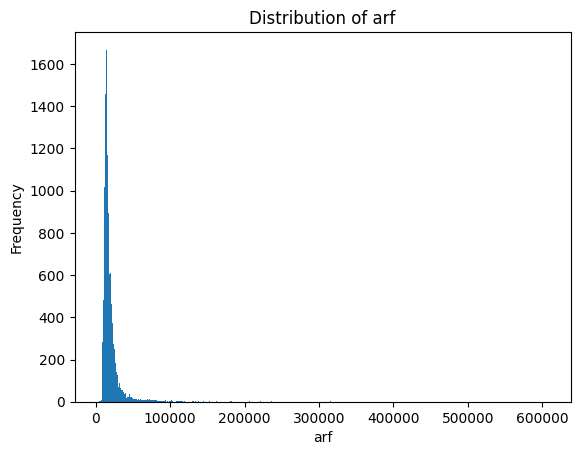

In [481]:
plt.hist(train_df['depreciation'], bins=1000)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

plt.title('Distribution of depreciation')
plt.xlabel('arf')
plt.ylabel('Frequency')
plt.show()




In [483]:
train_df[train_df['make'] == 'mercedes-benz']

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month,co2_emission
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,2017-12-28,2017,12,NaN
8,1297569,Mercedes-Benz C-Class C200 Avantgarde,mercedes-benz,c200,best-looking pearl-white c200 with nice black...,2017.0,NaN,28-nov-2017,luxury sedan,"parf car, premium ad car, low mileage car",...,NaN,uncategorized,"2.0l turbo-charged engine, 181 bhp, 9g-tronic ...","electric/memory leather seats, sports rims, fa...",NaN,102500.0,2017-11-28,2017,11,NaN
10,1307450,Mercedes-Benz C-Class C180K (COE till 02/2031),mercedes-benz,c180,"full loan/bank loan available, superbly well m...",2010.0,NaN,16-mar-2011,luxury sedan,"coe car, premium ad car",...,NaN,uncategorized,powerful 1.6l supercharged engine delivering 1...,"bluetooth carplay, camera, multi function stee...",NaN,87000.0,2011-03-16,2011,3,NaN
13,1277224,Mercedes-Benz E-Class E200d,mercedes-benz,e200,NaN,2017.0,NaN,04-dec-2017,luxury sedan,"parf car, premium ad car",...,NaN,uncategorized,2 litre turbocharged 4-cylinder engine pushing...,"colour shift interior ambient lighting, 360 ca...",NaN,103800.0,2017-12-04,2017,12,NaN
32,1307612,Mercedes-Benz E-Class E230 (COE till 12/2028),mercedes-benz,e230,0,2008.0,NaN,21-jan-2009,luxury sedan,"coe car, premium ad car",...,NaN,uncategorized,2.5l v6 engine mated to 7g-tronic gearbox prod...,new upholstery. push start.,NaN,47800.0,2009-01-21,2009,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24984,1301266,Mercedes-Benz AMG GT 53 Mild Hybrid 4MATIC+,mercedes-benz,amg,"collector's item ! immaculate, highest spec, s...",2019.0,NaN,15-nov-2019,sports car,"parf car, direct owner sale, low mileage car, ...",...,NaN,uncategorized,3.0l 6 cylinder inline 24valve turbocharged 45...,"dual 12.3 widescreen cockpit, burmester sound,...",NaN,373000.0,2019-11-15,2019,11,304.005348
24986,1309996,Mercedes-Benz Citan 109 CDI Van Extra-Long 2 S...,mercedes-benz,citan,"well taken care. full service, aircon, clutch,...",2016.0,NaN,11-aug-2016,van,premium ad car,...,10-aug-2036,uncategorized,"mercedes benz diesel powered cargo van, 5 spee...",NaN,NaN,26800.0,2016-08-11,2016,8,NaN
24990,1308831,Mercedes-Benz GLB-Class GLB180 Progressive,mercedes-benz,glb180,tip-top condition! most popular conti 7-seater...,2022.0,NaN,19-jul-2022,suv,"parf car, premium ad car",...,NaN,uncategorized,1.4l 4-cylinder inline 16-valve turbocharged e...,"factory fitted 18""rims,10.25"" touchscreen info...",NaN,190888.0,2022-07-19,2022,7,NaN
24995,1329201,Mercedes-Benz C-Class C180 (COE till 06/2031),mercedes-benz,c180,elegant looking and very well maintained by ow...,2011.0,NaN,14-jul-2011,luxury sedan,"coe car, premium ad car, low mileage car",...,NaN,uncategorized,inline 4 16 valves rwd engine displacement 179...,new battery new throttle body new recording ca...,NaN,85000.0,2011-07-14,2011,7,NaN


### scrap co2 emission

In [67]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = 'https://www.sgcarmart.com/used_cars/info.php?ID=1306309'

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 ' +
                  '(KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'
}

# Send a GET request to the webpage with headers
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for request errors

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with id 'carInfo'
table = soup.find('table', id='carInfo')

# Initialize an empty dictionary to store the features
car_features = {}

# Iterate over each row in the table
for row in table.find_all('tr'):
    cells = row.find_all('td')

    # Check if the row has 4 cells (standard feature rows)
    if len(cells) == 4:
        # Extract the first feature
        feature_name_tag = cells[0].find('strong')
        feature_value_tag = cells[1]
        if feature_name_tag and feature_value_tag:
            feature_name = feature_name_tag.get_text(strip=True)
            feature_value = feature_value_tag.get_text(strip=True)
            car_features[feature_name] = feature_value

        # Extract the second feature (if present)
        feature_name_tag_2 = cells[2].find('strong')
        feature_value_tag_2 = cells[3]
        if feature_name_tag_2 and feature_value_tag_2:
            feature_name_2 = feature_name_tag_2.get_text(strip=True)
            feature_value_2 = feature_value_tag_2.get_text(strip=True)
            car_features[feature_name_2] = feature_value_2
            
    
    elif len(cells) == 1 and cells[0].has_attr('colspan'):
        colspan = int(cells[0]['colspan'])
        if colspan >= 2:
            feature_title_tag = cells[0].find('div', class_='twoRow_info')
            if feature_title_tag:
                feature_title = feature_title_tag.get_text(strip=True)
                # Extract the entire content including the link
                content = cells[0]
                # Remove the feature title from the content
                content_text = content.get_text(separator=' ', strip=True).replace(feature_title, '').strip()
                # Check if there's an <a> tag
                link_tag = content.find('a')
                if link_tag:
                    link_url = link_tag.get('href')
                    link_text = link_tag.get_text(strip=True)
                    # Remove the link text from the content text
                    content_text = content_text.replace(link_text, '').strip()
                    # Store the feature description and link
                    car_features[feature_title] = content_text
                    car_features[f'{feature_title} Link'] = link_url
                else:
                    car_features[feature_title] = content_text


# Handle the rows with 'eachInfo' class (nested features)
each_info_sections = table.find_all('td', {'colspan': '2', 'style': True})

for section in each_info_sections:
    each_infos = section.find_all('div', class_='eachInfo')
    for info in each_infos:
        feature_name_tag = info.find('div', class_='row_title').find(['strong', 'a'])
        feature_value_tag = info.find('div', class_='row_info')
        if feature_name_tag and feature_value_tag:
            feature_name = feature_name_tag.get_text(strip=True)
            feature_value = feature_value_tag.get_text(strip=True)
            car_features[feature_name] = feature_value

# Print the extracted features
for key, value in car_features.items():
    print(f"{key}: {value}")

Depreciation: $13,770 /yr
Reg Date: 01-Apr-2015(5yrs  COE left)
Features: 1.6L inline 4 turbocharged engine with 7 speed dual clutch transmission, 120bhp/200nm, 0-100 km/h in 9.1s, 4.29m long with 2.70m wheelbase, 17" rims. View specs of the
Features Link: /new_cars/newcars_overview.php?CarCode=11306
Accessories: Dual electric seats with 3 memory settings, distance warning, reverse camera and sensors, 6 air bags, Bluetooth.
Accessories Link: /directory/listing.php?CAT=13
Description: Great for short term drive or to renew COE. Option to renew with 5 or 10 years COE. Replaced rear brake pad and discs on 6 June with receipt. Trade in welcome. Low interest bank loan and 100% in house loan available. Transparent dealing, no admin fees, no minimum loan. WhatsApp for viewing appointment, doorstep available.
Category: , Premium Ad Car , Low Mileage Car , Sgcarmart Warranty Cars
Category Link: https://www.sgcarmart.com/used_cars/listing.php?CAT=2
Status: Available for sale.  to get alerted whe

In [88]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = 'https://www.sgcarmart.com/' + car_features['Features Link'].replace('overview','specs')

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 ' +
                  '(KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'
}

# Send a GET request to the webpage with headers
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for request errors

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with id 'submodel_spec'
spec_table = soup.find('table', id='submodel_spec')

# Initialize a dictionary to store the specifications
specifications = {}

# Check if the table exists
if spec_table:
    # Iterate over all 'tr' elements in the table
    for row in spec_table.find_all('tr'):
        # Get all 'td' elements in the row
        cells = row.find_all('td')
        if len(cells) == 2:
            # Get the specification name and value
            spec_name = cells[0].get_text(strip=True)
            spec_value = cells[1].get_text(strip=True)
            specifications[spec_name] = spec_value

# Extract the CO2 Emission (LTA) value
co2_emission = specifications.get('CO2 Emission (LTA)', 'N/A')

# Print the CO2 Emission (LTA)
co2_emission

'126 g/km (As tested by LTA)'